In [2]:
seriesimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt
%matplotlib inline

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

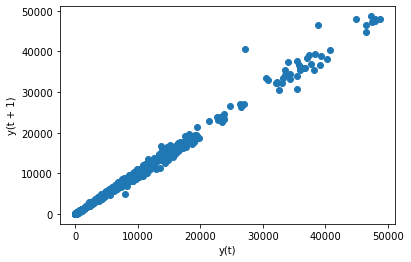

In [3]:
bitcoin = pd.read_csv("bitcoin.csv")
series = bitcoin["Closing Price (USD)"]
series=series.sort_index(ascending=False)
lag_plot(series)

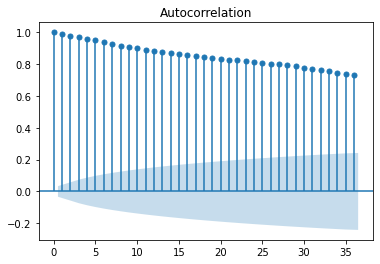

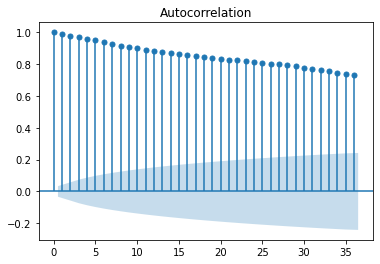

In [4]:
plot_acf(series)

In [5]:
values = pd.DataFrame(series.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t-1', 't+1']
df

,t-1,t+1
0,NaN,5.97
1,5.97,5.53
2,5.53,5.13
3,5.13,4.85
4,4.85,4.87
...,...,...
3431,47981.48,47395.84
3432,47395.84,47228.48
3433,47228.48,48662.50
3434,48662.50,47942.57


predicted=13652.772901, expected=13816.080000
predicted=13825.575267, expected=13762.000000
predicted=13695.634924, expected=13563.720000
predicted=13529.087845, expected=14041.580000
predicted=13976.235276, expected=14160.590000
predicted=14179.425669, expected=15605.040000
predicted=15626.972384, expected=15598.090000
predicted=15637.321761, expected=14838.970000
predicted=14904.577368, expected=15489.150000
predicted=15475.415361, expected=15332.040000
predicted=15516.938413, expected=15313.650000
predicted=15214.704228, expected=15707.890000
predicted=15580.645339, expected=16300.000000
predicted=16422.283562, expected=16335.580000
predicted=16250.022396, expected=16086.340000
predicted=16278.096866, expected=15975.490000
predicted=15963.589782, expected=16724.620000
predicted=16593.224018, expected=17680.630000
predicted=17688.325794, expected=17785.950000
predicted=17653.394806, expected=17825.470000
predicted=17870.936879, expected=18687.650000
predicted=18750.387873, expected=1

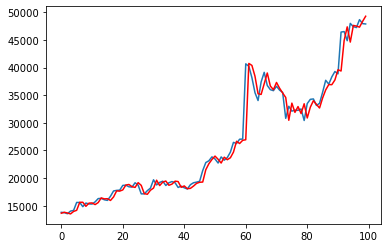

In [47]:
X = series.values
train, test = X[1:len(X)-100], X[len(X)-100:]
window = 42
model = AutoReg(train,lags=window, old_names=False)
model_fit=model.fit()
coef = model_fit.params
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window, length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat,obs))
rmse = sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f' % rmse)
plt.plot(test)
plt.plot(predictions, color='red')